In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from world_builder import (
    load_ecosystem_config,
    create_animal,
    EcosystemConfig
)

In [28]:
basic_config_dict = {
    "base_probabilities_finite": {
        "species": {
            "rabbit": 0.4,
            "bird": 0.4,
            "fox": 0.2
        }
    },
    "base_probabilities_distributions": {
        "age": {
            "type": "truncated_normal",
            "mean": 5,
            "std": 2,
            "lower": 0,
            "upper": 15
        }
    }
}

In [29]:
ecosystem_config = EcosystemConfig(**basic_config_dict)

In [30]:
create_animal(ecosystem_config)

Animal(species='bird', age=5.821058046078761, animal_id='AN-BIR--019bd6b3-fc1d-7000-9540-6e350680e6ee')

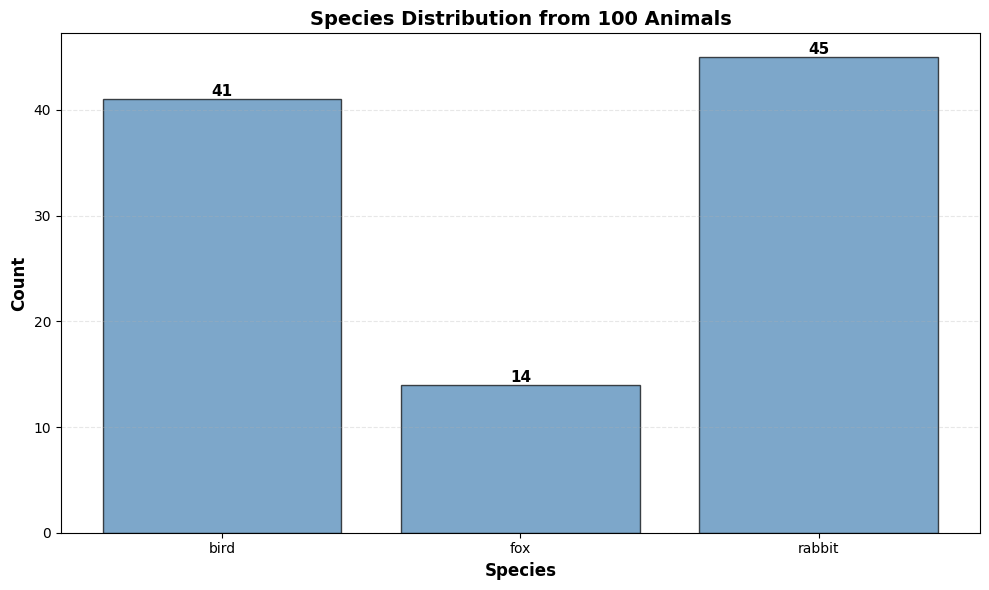

Generated 100 animals

Species breakdown:
species
bird      41
fox       14
rabbit    45
Name: count, dtype: int64


In [ ]:
num_animals = 100
animals = [create_animal(ecosystem_config) for _ in range(num_animals)]

animals_data = [animal.__dict__ for animal in animals]
df = pd.DataFrame(animals_data)

fig, ax = plt.subplots(figsize=(10, 6))
species_counts = df['species'].value_counts().sort_index()

bars = ax.bar(species_counts.index, species_counts.values, 
              color='steelblue', edgecolor='black', alpha=0.7)
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_xlabel('Species', fontsize=12, fontweight='bold')
ax.set_title(f'Counting Animals in the Forest', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()